In [1]:
from IPython.display import Image 

In [3]:
from konlpy.tag import Hannanum
from urllib.request import urlopen
from lxml import html
from collections import Counter

import random
import pytagcloud      # requires Korean font support
import webbrowser

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
rndno = lambda: random.randint(0, 255)
color = lambda: (rndno(), rndno(), rndno())

In [5]:
color()

(188, 101, 104)

In [6]:
# 대한민국 정치의 모든것 : 인물, 의안, 정당, 지역 
def get_bill_text(billnum):
    url = 'http://pokr.kr/bill/{num}/text'.format(num=billnum)
    response = urlopen(url).read().decode('utf-8')
    page = html.fromstring(response)
    text = page.xpath(".//div[@id='bill-sections']/pre/text()")[0]
    
    return text

In [7]:
def get_tags(text, ntags=50, multiplier=10):
    hannanum = Hannanum()
    nouns = hannanum.nouns(text)
    count = Counter(nouns)
    return [
        {'color' : color(),
         'tag' : n,
         'size' : c*multiplier,
        }
        for n, c in count.most_common(ntags)
    ]

In [8]:
def draw_cloud(tags, filename, fontname='Korean', size=(800, 600)):
    pytagcloud.create_tag_image(tags, filename, fontname=fontname, size=size)
    webbrowser.open(filename)
    

In [9]:
# 동물보호법 일부개정법률안 번호
bill_num = '1904882'     # 2013.05.08.
bill_num = '1918479'     # 2016.01.20.
text = get_bill_text(bill_num)
print(text)


동물보호법 일부개정법률안

(이상일의원 대표발의)

의 안
번 호

18479

발의연월일 : 2016. 1. 20.

발 의 자 : 이상일ㆍ신성범ㆍ조명철

최봉홍ㆍ박창식ㆍ박윤옥

박성호ㆍ유의동ㆍ이이재

김태원ㆍ김성태ㆍ이종배

의원(12인)

제안이유 및 주요내용

최근 반려동물의 치료 등에 사용되는 혈액 제공을 목적으로 사육되

는 공혈견(供血犬)에 대한 학대와 사육상의 위생 및 관리감독 부실 등

이 지적되고 있으나 현행법에서는 동물혈액의 판매 등에 관한 영업에

대해 규정하고 있지 않아 동물보호 및 공중위생상의 사각지대가 존재

함.

이에 반려동물과 관련된 영업의 종류에 동물혈액판매업을 새롭게

규정하여 영업자와 종사자는 영업에 필요한 준수사항을 지키고 동물

보호 및 공중위생상의 교육을 받도록 하는 등 관리·감독을 강화하려는

것임(안 제32조).

- 1 -

법률 제

호

동물보호법 일부개정법률안

동물보호법 일부를 다음과 같이 개정한다.

제32조제1항제4호를 제5호로 하고, 같은 항에 제4호를 다음과 같이 신

설한다.

4. 동물혈액판매 등 대통령령으로 정하는 영업

제33조제1항 중 “제3호”를 “제4호”로 한다.

제34조제1항 중 “제32조제1항제4호”를 “제32조제1항제5호”로 한다.

제37조제1항 중 “제4호”를 “제5호”로 한다.

부

칙

이 법은 공포 후 6개월이 경과한 날부터 시행한다.

- 3 -

신·구조문대비표

현

행

개 정 안

제32조(영업의 종류 및 시설기준

제32조(영업의 종류 및 시설기준

등) ① 농림축산식품부령으로

등) ① ---------------------

정하는 개·고양이·토끼 등 가정

----------------------------

에서 반려(伴侶)의 목적으로 기

----------------------------

르는 동물과 관련된 다음 각

----------------------------

호의 영업을 하려는 자는 농림

------------------------

In [10]:
tags = get_tags(text)
tags = get_tags(text, ntags=200)
tags[::5]

[{'color': (67, 215, 255), 'tag': '등', 'size': 90},
 {'color': (163, 27, 79), 'tag': '현행', 'size': 60},
 {'color': (152, 41, 243), 'tag': '1.', 'size': 30},
 {'color': (103, 2, 134), 'tag': '4.', 'size': 30},
 {'color': (72, 188, 80), 'tag': '의', 'size': 20},
 {'color': (25, 152, 86), 'tag': '관련', 'size': 20},
 {'color': (99, 20, 171), 'tag': '제', 'size': 20},
 {'color': (199, 107, 53), 'tag': '시설기준', 'size': 20},
 {'color': (45, 223, 56), 'tag': '제33조(영업', 'size': 20},
 {'color': (168, 112, 130), 'tag': '제37조(교육)', 'size': 20},
 {'color': (57, 84, 3), 'tag': '18479', 'size': 10},
 {'color': (227, 32, 246), 'tag': '이상일ㆍ신성범ㆍ조명철', 'size': 10},
 {'color': (73, 59, 106), 'tag': '12인', 'size': 10},
 {'color': (49, 196, 166), 'tag': '혈액', 'size': 10},
 {'color': (75, 76, 46), 'tag': '사육', 'size': 10},
 {'color': (30, 176, 241), 'tag': '동물혈액', 'size': 10},
 {'color': (41, 153, 222), 'tag': '함', 'size': 10},
 {'color': (112, 225, 192), 'tag': '준수사항', 'size': 10},
 {'color': (185, 69, 207), 'ta

In [11]:
len(tags)

155

In [12]:
# number_word = [str(i) for i in range(10)]
number_word = list(str(i) for i in range(10))
number_word

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [13]:
circle_word = list("①②③④⑤⑥⑦⑧⑨⑩⑪⑫⑬⑭⑮")
circle_word

['①', '②', '③', '④', '⑤', '⑥', '⑦', '⑧', '⑨', '⑩', '⑪', '⑫', '⑬', '⑭', '⑮']

In [14]:
filter_word = number_word + circle_word
# filter_word

In [15]:
result_tags = [] 

# filtering word
number_word = list(str(i) for i in range(10))
circle_word = list('①②③④⑤⑥⑦⑧⑨⑩⑪⑫⑬⑭⑮')
escape_word = list('. , -  ) ( “ \\ \' \" ')
filter_word = number_word + circle_word + escape_word

for tag in tags:
    t_val = tag['tag'] 

    if len(t_val)==1:
        continue
    elif t_val[0] in filter_word or t_val[1] in filter_word:
        continue
    else:
        result_tags.append(tag)
    
len(result_tags)

80

In [16]:
result_tags[:]

[{'color': (37, 118, 175), 'tag': '영업', 'size': 90},
 {'color': (163, 27, 79), 'tag': '현행', 'size': 60},
 {'color': (238, 230, 77), 'tag': '동물보호법', 'size': 30},
 {'color': (41, 185, 157), 'tag': '공중위생상', 'size': 30},
 {'color': (97, 34, 68), 'tag': '종류', 'size': 30},
 {'color': (22, 227, 36), 'tag': '동물', 'size': 30},
 {'color': (106, 56, 237), 'tag': '다음', 'size': 30},
 {'color': (13, 218, 170), 'tag': '등록', 'size': 30},
 {'color': (99, 152, 190), 'tag': '일부개정법률안', 'size': 20},
 {'color': (233, 32, 251), 'tag': '반려동물', 'size': 20},
 {'color': (41, 6, 143), 'tag': '목적', 'size': 20},
 {'color': (74, 177, 236), 'tag': '규정하', 'size': 20},
 {'color': (25, 152, 86), 'tag': '관련', 'size': 20},
 {'color': (175, 184, 13), 'tag': '영업자', 'size': 20},
 {'color': (35, 178, 26), 'tag': '보호', 'size': 20},
 {'color': (215, 230, 142), 'tag': '교육', 'size': 20},
 {'color': (11, 41, 125), 'tag': '동물혈액판매', 'size': 20},
 {'color': (199, 107, 53), 'tag': '시설기준', 'size': 20},
 {'color': (195, 170, 166), 'tag'

In [17]:
# ! dir wordcloud

In [23]:
# draw_cloud(tags, 'wordcloud/동물보호법.png')
# draw_cloud(result_tags, img_wordcloud)

img_wordcloud = 'wordcloud/wc_aniaml_law.png'
draw_cloud(result_tags, img_wordcloud, fontname='Korean', size=(500, 350))

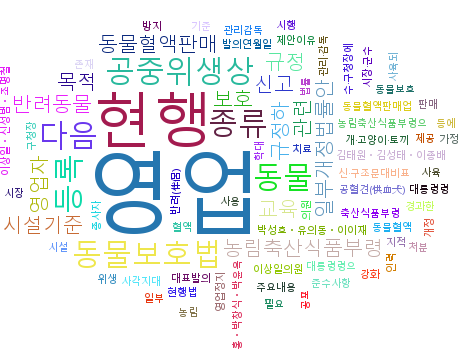

In [21]:
Image(img_wordcloud)

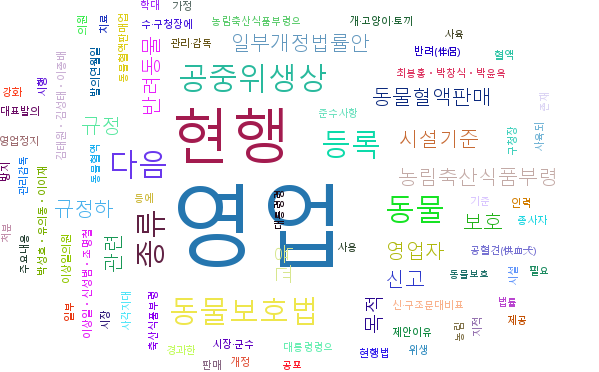

In [24]:
img_wordcloud = 'wordcloud/wc_aniaml_law.png'
draw_cloud(result_tags, img_wordcloud, fontname='Korean', size=(600, 400))
Image(img_wordcloud)